## Train a model with bike rental data using XGBoost algorithm
### Training log1p(count) dataset
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [3]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [ ]:
columns

In [4]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [ ]:
df_train.head()

In [ ]:
df_validation.head()

In [5]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [6]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)

In [ ]:
regressor

In [7]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[09:10:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.90569	validation_1-rmse:3.91564
[1]	validation_0-rmse:3.52714	validation_1-rmse:3.53522
[2]	validation_0-rmse:3.1863	validation_1-rmse:3.19342
[3]	validation_0-rmse:2.8796	validation_1-rmse:2.88581
[4]	validation_0-rmse:2.6038	validation_1-rmse:2.60928
[5]	validation_0-rmse:2.35764	validation_1-rmse:2.36228
[6]	validation_0-rmse:2.13651	validation_1-rmse:2.14069
[7]	validation_0-rmse:1.93837	validation_1-rmse:1.94222
[8]	validation_0-rmse:1.75935	validation_1-rmse:1.76412
[9]	validation_0-rmse:1.59886	validation_1-rmse:1.60299
[10]	validation_0-rmse:1.45504	validation_1-rmse:1.45899
[11]	validation_0-rmse:1.32712	validation_1-rmse:1.33112
[12]	validation_0-rmse:1.21307	validation_1-rmse:1.21746
[13]	validation_0-rmse:1.1061	validation_1-rmse:1.11128
[14]	validation_0-rmse:1.01432	validation_1-rmse:1.02
[15]	validation_0-rmse:0.933885	validation_1-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_round=150, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [8]:
df_train['count'].describe()

count    7620.000000
mean        4.583886
std         1.429959
min         0.693147
25%         3.737670
50%         4.976734
75%         5.652489
max         6.885510
Name: count, dtype: float64

In [9]:
eval_result = regressor.evals_result()

In [10]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [11]:
print(training_rounds)

range(0, 100)


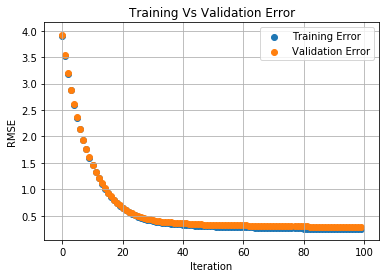

In [12]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

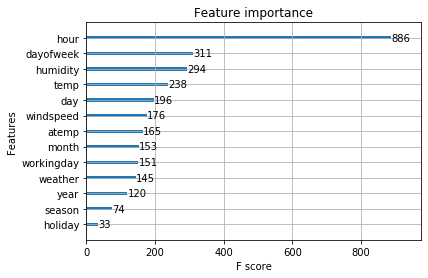

In [13]:
xgb.plot_importance(regressor)

In [14]:
df = pd.read_csv('bike_all.csv')

In [15]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2.833213,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0
1,3.713572,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1
2,3.496508,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2
3,2.639057,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3
4,0.693147,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4


In [16]:
X_test = df.iloc[:,1:]
print(X_test[:5])

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  day  dayofweek  hour  
0  2011      1    1          5     0  
1  2011      1    1          5     1  
2  2011      1    1          5     2  
3  2011      1    1          5     3  
4  2011      1    1          5     4  


In [17]:
result = regressor.predict(X_test)

In [19]:
result[:5]

array([3.172068 , 3.126216 , 2.7676816, 2.0698543, 1.1780057],
      dtype=float32)

In [20]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2.833213,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0
1,3.713572,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1
2,3.496508,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2
3,2.639057,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3
4,0.693147,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4


In [21]:
df['count_predicted'] = result

In [22]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,2.833213,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0,3.172068
1,3.713572,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1,3.126216
2,3.496508,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2,2.767682
3,2.639057,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3,2.069854
4,0.693147,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4,1.178006


In [23]:
# Negative Values are predicted
df['count_predicted'].describe()

count    10886.000000
mean         4.587574
std          1.381266
min          0.554421
25%          3.755993
50%          4.996366
75%          5.625453
max          6.735898
Name: count_predicted, dtype: float64

In [24]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [26]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [27]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [28]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


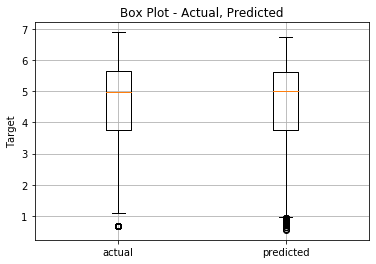

In [29]:
plt.boxplot([df['count'],df['count_predicted']], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

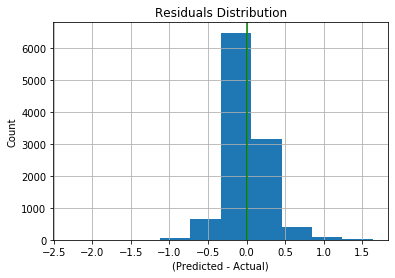

In [30]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count_predicted'] - df['count'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='g')


In [31]:
import sklearn.metrics as metrics
print("RMSE: {0}".format(metrics.mean_squared_error(df['count'].map(np.expm1),df['count_predicted'].map(np.expm1))**.5))

RMSE: 40.72906502454965


In [32]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [33]:
print("RMSLE: {0}".format(compute_rmsle(df['count'].map(np.expm1),df['count_predicted'].map(np.expm1))))

RMSLE: 0.26142184567722604


In [34]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [35]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [36]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [37]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [49]:
result = regressor.predict(X_test)

In [39]:
result[:5]

array([2.243555 , 1.8693211, 1.5391917, 1.1167078, 1.019527 ],
      dtype=float32)

In [40]:
np.expm1(result)

array([  8.4267845,   5.483893 ,   3.6608214, ..., 127.01953  ,
       106.120056 ,  56.251286 ], dtype=float32)

In [ ]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [45]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [47]:
df_test[df_test["count"] < 0]

KeyError: 'count'

In [50]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

KeyError: "['count'] not in index"

In [ ]:
# RMSLE (Kaggle) Scores
# Test 1: 1.32
# Test 2 (added new feature): 0.61646
# Test 3 0.4